In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
from scipy.optimize import minimize

In [3]:
def f(x):
    return (x-2)**2

res = minimize(f, x0=2)

In [4]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0
        x: [ 2.000e+00]
      nit: 0
      jac: [ 1.490e-08]
 hess_inv: [[1]]
     nfev: 2
     njev: 1

In [5]:
res.x

array([2.])

In [6]:
?minimize


Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where ``n`` is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <

In [7]:
minimize?


Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where ``n`` is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <

In [16]:
#minimize a 2d function
#use lambda function

f = lambda x: (x[0]-1)**2 + (x[1]-2.5)**2
print(f([0,0]))

#defining constraints as a tuple of dictionaries

cons = ({'type':'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type':'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type':'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})

#defining bounds on x[0], x[1]

bnds = ((0,None), (0,None))

#use minimize function

res = minimize(f, (110,230), bounds=bnds, constraints=cons)

7.25


In [17]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.7999999999999988
       x: [ 1.400e+00  1.700e+00]
     nit: 5
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 15
    njev: 5

In [18]:
res.x

array([1.39999999, 1.7       ])

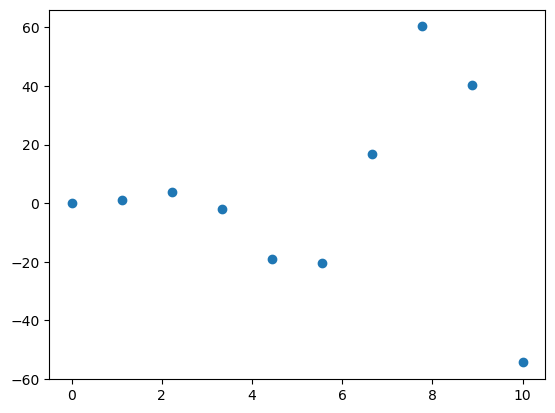

In [19]:
#interpolation

x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

In [20]:
from scipy.interpolate import interp1d


In [21]:
interp1d?

Init signature:
interp1d(
    x,
    y,
    kind='linear',
    axis=-1,
    copy=True,
    bounds_error=None,
    fill_value=nan,
    assume_sorted=False,
)
Docstring:     
Interpolate a 1-D function.

.. legacy:: class

    For a guide to the intended replacements for `interp1d` see
    :ref:`tutorial-interpolate_1Dsection`.

`x` and `y` are arrays of values used to approximate some function f:
``y = f(x)``. This class returns a function whose call method uses
interpolation to find the value of new points.

Parameters
----------
x : (npoints, ) array_like
    A 1-D array of real values.
y : (..., npoints, ...) array_like
    A N-D array of real values. The length of `y` along the interpolation
    axis must be equal to the length of `x`. Use the ``axis`` parameter
    to select correct axis. Unlike other interpolators, the default
    interpolation axis is the last axis of `y`.
kind : str or int, optional
    Specifies the kind of interpolation as a string or as an integer
    specify

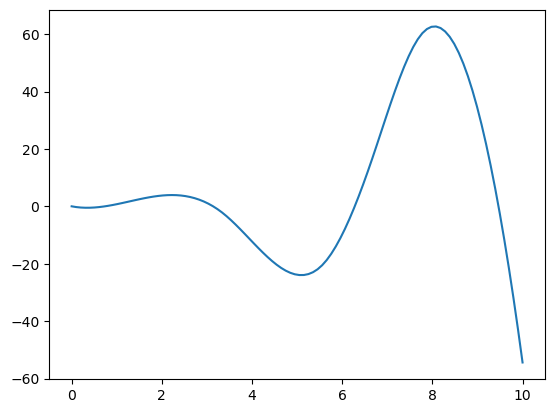

In [25]:
f = interp1d(x,y,kind = 'cubic')
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)

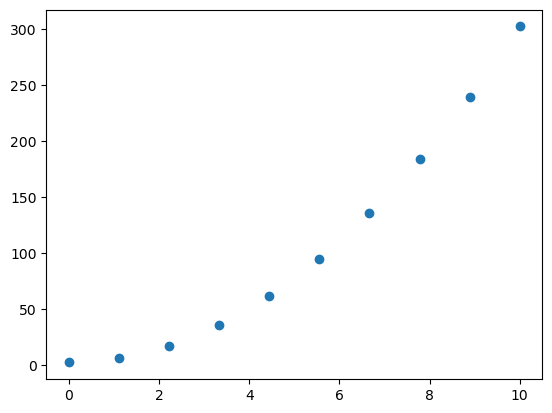

In [26]:
#curve fitting
from scipy.optimize import curve_fit

x_data = np.linspace(0,10,10)
y_data = 3*x**2 + 2
plt.scatter(x_data,y_data)

In [27]:
def func(x, a, b):
    return a*x**2 + b

popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))


In [28]:
popt

array([3., 2.])

In [29]:
pcov

array([[ 4.13297331e-34, -1.45419433e-32],
       [-1.45419433e-32,  9.65872308e-31]])

In [30]:
#another example
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

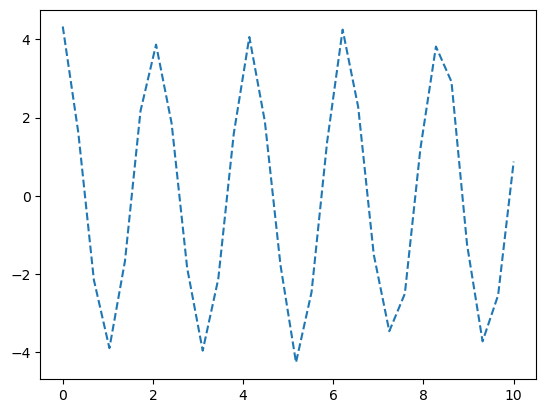

In [31]:
plt.plot(t_data, y_data, '--')

In [32]:
# We intend to fit this curve to a cosine curve of the form Acos(wt + phi)

def func(x, A, w, phi):
    return A*np.cos(w*x + phi)

popt,pcov = curve_fit(func, t_data, y_data, p0 = (4, np.pi, 0))

In [33]:
A, w, phi = popt

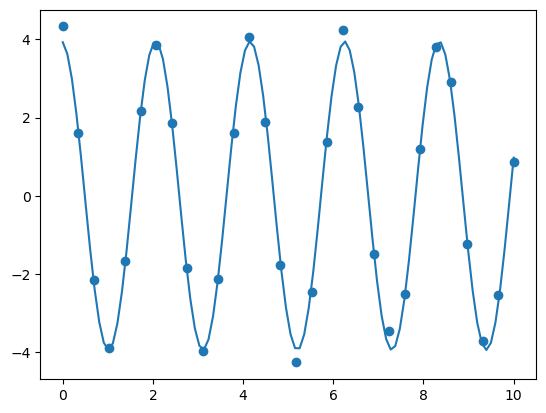

In [34]:
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)
plt.scatter(t_data, y_data)
plt.plot(t, y)

In [ ]:
#we need to be very careful about the initial conditions

In [39]:
#Calculus 
#Differentiation

from scipy.misc import derivative
from scipy.misc import findiff

ImportError: cannot import name 'findiff' from 'scipy.misc' (c:\Users\aayus\anaconda3\envs\my_env_1\Lib\site-packages\scipy\misc\__init__.py)

C:\Users\aayus\AppData\Local\Temp\ipykernel_17912\942677022.py:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-9))
C:\Users\aayus\AppData\Local\Temp\ipykernel_17912\942677022.py:6: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6, n=2))


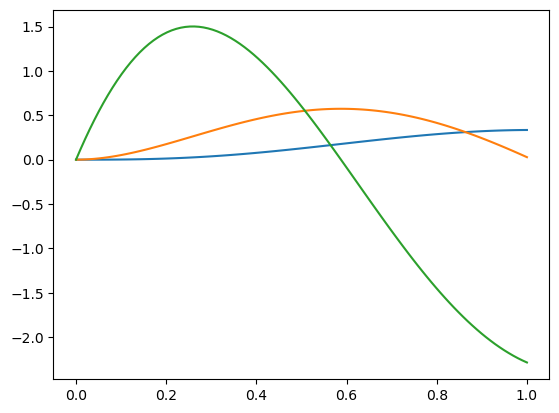

In [41]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)
x=np.linspace(0, 1, 100)
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx=1e-9))
plt.plot(x, derivative(f, x, dx=1e-6, n=2))

In [42]:
#Integration

from scipy.integrate import quad

In [43]:
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

In [44]:
integral

0.14558175869954834

In [45]:
#Double integral
from scipy.integrate import dblquad


In [50]:
integrand = lambda y,x: np.sin(x + y**2)

In [51]:
#bounds for y
lwr_y = lambda x: -x
upr_y = lambda x: x**2


In [52]:
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y )

In [53]:
integral

0.590090324408853

In [54]:
#Solving differential equations
from scipy.integrate import odeint

In [67]:
**First Order ODEs**

#Air friction while falling

#$$ v' - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0$$

SyntaxError: invalid syntax (2254865158.py, line 1)

In [68]:
#info about diff eqn
def dvdt(v, t):
    return 3*v**2 - 5
v0 = 0


In [70]:
#solve diff eqn
t = np.linspace(0, 1, 100)
sol = odeint(dvdt, v0, t)

In [71]:
type(sol)

numpy.ndarray

In [72]:
sol.T

array([[ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
        -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
        -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
        -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
        -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
        -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
        -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
        -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
        -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
        -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
        -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
        -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
        -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
        -1.27512464, -1.2763122 , -1.27741137, -1.2

In [73]:
sol.shape

(100, 1)

In [74]:
sol.T[0].shape

(100,)

In [75]:
vsol = sol.T[0]

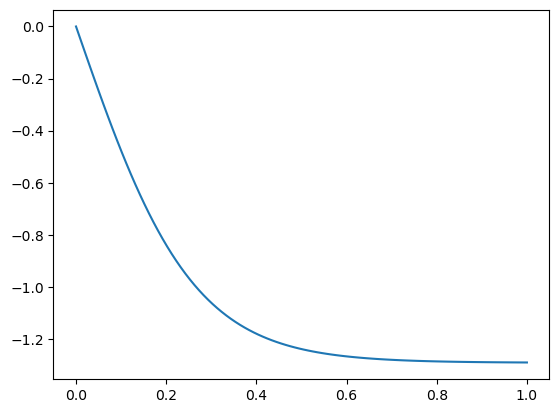

In [76]:
plt.plot(t, vsol)

In [77]:
#Coupled First Order DE
#info about diff eqn
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2**2 +3*x, 
            3*y1 + y2**3 - np.cos(x)]

y1_0 = 0
y2_0 = 0

S_0 = (y1_0, y2_0)

In [78]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

In [79]:
sol.shape

(100, 2)

In [80]:
x.shape

(100,)

In [81]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

In [82]:
y1_sol.shape

(100,)

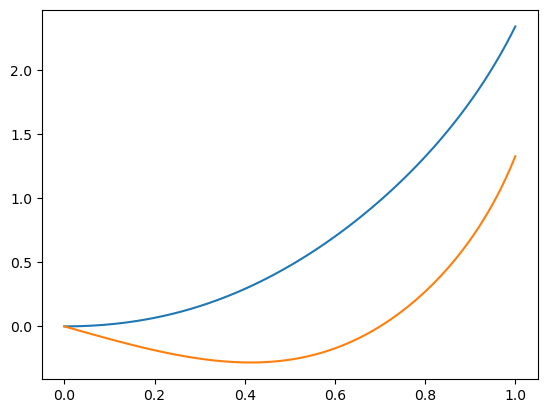

In [83]:
plt.plot(x, y1_sol)
plt.plot(x, y2_sol)